In [31]:
# Conectar-se ao Drive
from google.colab import drive

# https://docs.python.org/3/library/os.html
import os
import matplotlib.pyplot as plt

# skimage.io para carregar as imagens
# https://scikit-image.org/docs/dev/api/skimage.io.html
from skimage import io

# https://pandas.pydata.org/
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [7]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Diretório do trabalho no drive

In [20]:
os.chdir('/content/gdrive/My Drive/MAC5768 - Visão computacional/ep1/')

Metadados

In [22]:
metadados = pd.read_csv('metadados/metadados.csv', delimiter=";")

In [23]:
metadados.head()

,img_arquivo,classe,objeto,repetição,fundo,iluminacao,local,tamanho,resolução
0,20210417_153013.jpg,óculos,óculos gucci,1,branco,dia,interno,NaN,NaN
1,20210417_153014(0).jpg,óculos,óculos gucci,2,branco,dia,interno,NaN,NaN
2,20210417_153014.jpg,óculos,óculos gucci,3,branco,dia,interno,NaN,NaN
3,20210417_153025(0).jpg,óculos,óculos dior,1,branco,dia,interno,NaN,NaN
4,20210417_153025.jpg,óculos,óculos dior,2,branco,dia,interno,NaN,NaN


Trata metadados

In [27]:
metadados.loc[metadados.fundo == "tijolo", "fundo"] = "madeira"

Função para usuário escolher a classe

In [28]:
def let_user_pick(options):
    print("Qual classe você quer visualizar?")
    for idx, element in enumerate(options):
        print("{}) {}".format(idx+1,element))
    i = input("Enter number: ")
    try:
        if 0 < int(i) <= len(options):
            return int(i)
    except:
        pass
    return None
options = metadados.classe.unique()
class_id = [1, 2, 3, 4]
class_dict = dict(zip(class_id, metadados.classe.unique()))

Cria Mnist

Qual classe você quer visualizar?
1) óculos
2) necessaire
3) colher
4) xícara
Enter number: 3


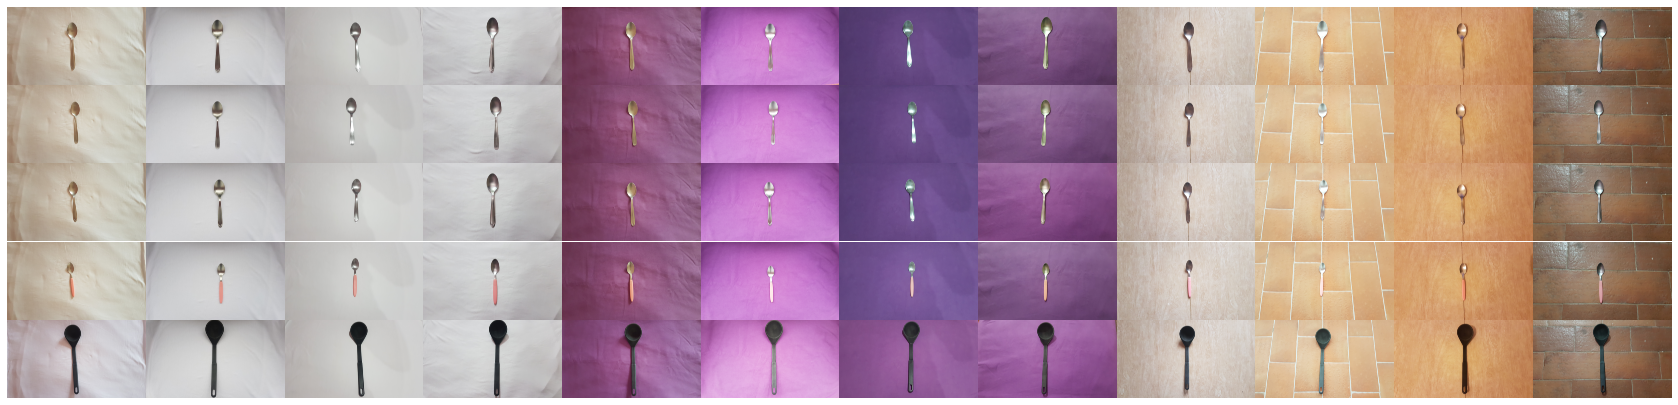

In [34]:
answer = let_user_pick(options)
answer = class_dict[answer]

metadados_filtro = metadados[metadados.classe == answer]

import itertools
list_env = [metadados_filtro.fundo.unique(), metadados_filtro.iluminacao.unique(), metadados_filtro.local.unique()]
list_env_iter = tuple(itertools.product(*list_env))

list_obj = metadados_filtro.objeto.unique()

# traz uma imagem para input de dimensões
image = mpimg.imread('dados/20210417_153013.jpg')
num_row = len(list_obj)
num_col = len(list_env_iter)
height = image.shape[0]/1000
width = image.shape[1]/1030

# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(num_col*width, num_row*height))
for i, obj in enumerate(list_obj):
    for j, (fundo, ilum, local) in enumerate(list_env_iter):

        df_aux = metadados_filtro[
            (metadados_filtro['repetição'].eq(1)) &
            (metadados_filtro['objeto'].eq(obj)) &
            (metadados_filtro['fundo'].eq(fundo)) &
            (metadados_filtro['iluminacao'].eq(ilum)) &
            (metadados_filtro['local'].eq(local))
        ]
        arquivo = df_aux['img_arquivo'].values
        image = mpimg.imread('dados/' + arquivo[0])
        ax = axes[i, j]
        ax.imshow(image, aspect='equal')
        ax.set_axis_off()
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()